In [1]:
# Import basic packages

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import Dataset
USAHousing=pd.read_csv('USA_Housing.csv')
USAHousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
# To check the info of dataset
USAHousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
USAHousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [5]:
# To check basic stats

USAHousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


# Data Preprocessing

In [6]:
# To check missing values

USAHousing.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

There are no missing values

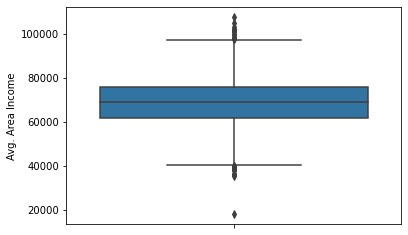

In [7]:
# To check Outlier

sns.boxplot(y='Avg. Area Income',data=USAHousing)

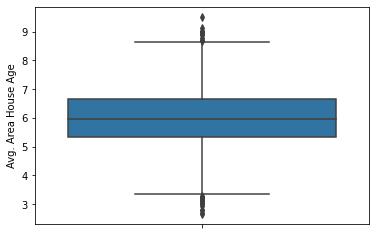

In [8]:
sns.boxplot(y='Avg. Area House Age',data=USAHousing)

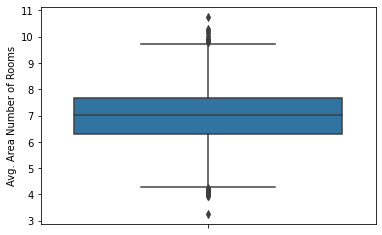

In [9]:
sns.boxplot(y='Avg. Area Number of Rooms',data=USAHousing)

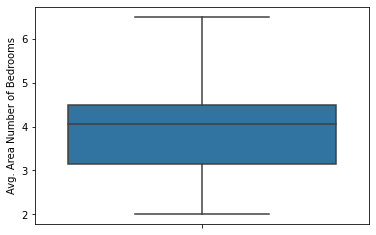

In [10]:
sns.boxplot(y='Avg. Area Number of Bedrooms',data=USAHousing)

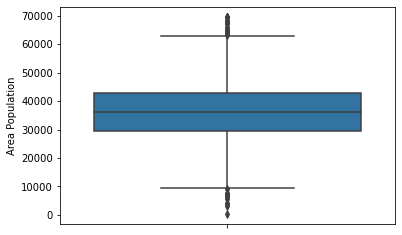

In [11]:
sns.boxplot(y='Area Population',data=USAHousing)

From boxplot we can observe there are outliers in Avg. Area Income, Avg. Area House Age, Avg. Area Number of Rooms, Area Population columns

In [12]:
# Using IQR Method to remove outliers

Q1=USAHousing.quantile(0.25)
Q3=USAHousing.quantile(0.75)
IQR=Q3-Q1
pos_outlier=Q3+1.5*IQR
neg_outlier=Q1-1.5*IQR

In [13]:
# Remove the values which are above Q3+1.5*IQR and below Q1-1.5*IQR
USAHousing=USAHousing[~((USAHousing<neg_outlier)|(USAHousing>pos_outlier)).any(axis=1)]

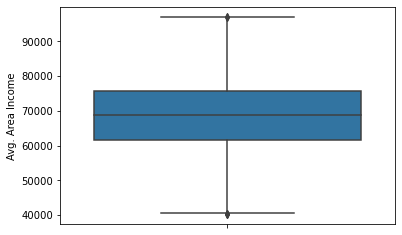

In [15]:
sns.boxplot(y='Avg. Area Income',data=USAHousing)

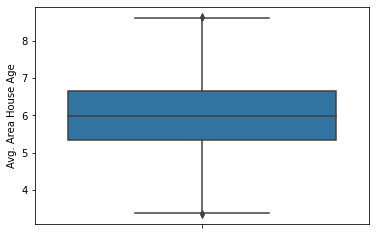

In [16]:
sns.boxplot(y='Avg. Area House Age',data=USAHousing)

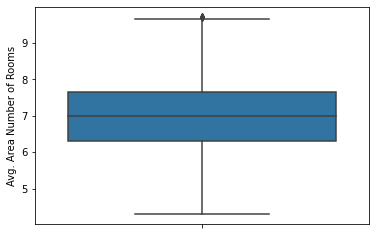

In [17]:
sns.boxplot(y='Avg. Area Number of Rooms',data=USAHousing)

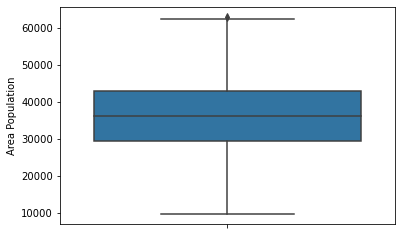

In [18]:
sns.boxplot(y='Area Population',data=USAHousing)

In [20]:
# Address is non-significant variable hence dropping tht column
USAHousing=USAHousing.iloc[:,0:6]

In [21]:
USAHousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


# Exploratory Data Analysis

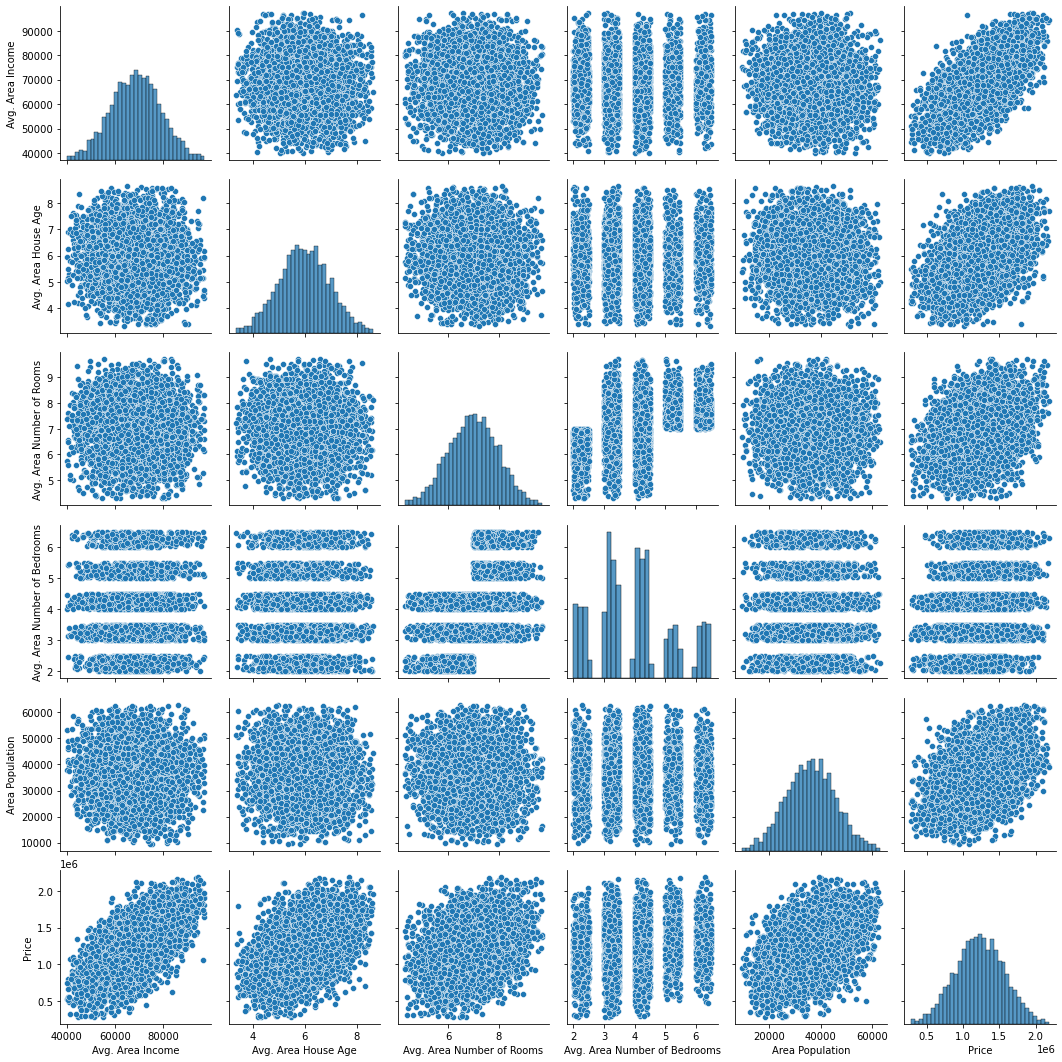

In [22]:
# Multivariate Analysis

sns.pairplot(USAHousing)

From visiualization we can observe:
1. price is increasing with increase in Avg-Area Income i.e it is highly correlated
2. Avg_Area House_Age is moderately correlated with price
3. Avg_Area Number_of_Rooms has weak correlation with price
4. Avg_Area Number_of_Bedrooms has no correlation with price & therefore it is not significant and we can drop this column
5. Area_Population is weakly correlated with price


c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


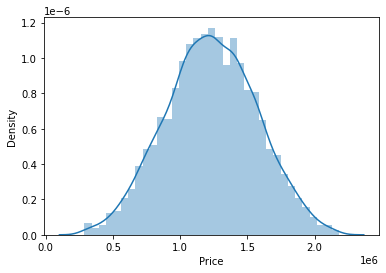

In [23]:
  # Uni-variate analysis
    
sns.distplot(USAHousing['Price'])

From above plot we can say Price is normally distributed

In [24]:
USAHousing.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.021102,-0.021113,0.012875,-0.014097,0.632031
Avg. Area House Age,-0.021102,1.000000,-0.016919,0.001177,-0.024151,0.441675
Avg. Area Number of Rooms,-0.021113,-0.016919,1.000000,0.466596,-0.000244,0.329630
Avg. Area Number of Bedrooms,0.012875,0.001177,0.466596,1.000000,-0.023172,0.168606
Area Population,-0.014097,-0.024151,-0.000244,-0.023172,1.000000,0.406027
Price,0.632031,0.441675,0.329630,0.168606,0.406027,1.000000


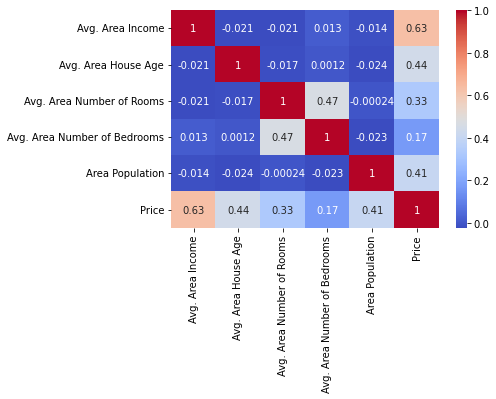

In [26]:
# Bi-variate analysis

sns.heatmap(USAHousing.corr(),annot=True,cmap='coolwarm')

In [28]:
USAHousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [32]:
# Splitting the data into independent & dependent variables

x=USAHousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y=USAHousing['Price']

In [33]:
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [34]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

#### Feature scaling


In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [37]:
x_scaled

array([[ 1.06071779, -0.30363229,  0.02290907,  0.0859644 , -1.35240284],
       [ 1.03191461,  0.02775903, -0.25978767, -0.72371729,  0.4207993 ],
       [-0.7110857 , -0.11411114,  1.5498338 ,  0.92803335,  0.07927052],
       ...,
       [-0.50694938,  1.31970959, -2.2154799 , -1.50101171, -0.29599705],
       [-0.05953013, -0.45737203,  0.14574608,  1.17903467,  0.67532313],
       [-0.30123371,  0.0167887 , -0.1973158 ,  0.06977076,  1.07753698]])

In [38]:
pd.DataFrame(x_scaled)

,0,1,2,3,4
0,1.060718,-0.303632,0.022909,0.085964,-1.352403
1,1.031915,0.027759,-0.259788,-0.723717,0.420799
2,-0.711086,-0.114111,1.549834,0.928033,0.079271
3,-0.511360,1.255143,-1.421675,-0.586071,-0.187641
4,-0.837711,-0.968724,0.866021,0.199320,-1.013324
...,...,...,...,...,...
4860,-0.780870,1.920048,-0.862483,-0.424135,-1.378290
4861,0.958419,1.059334,-0.416242,0.029287,-1.089912
4862,-0.506949,1.319710,-2.215480,-1.501012,-0.295997
4863,-0.059530,-0.457372,0.145746,1.179035,0.675323


#### VIF( Variance Inflation Factor)


In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable=x_scaled
vif=pd.DataFrame()
vif['Variance Inflation Factor']=[variance_inflation_factor(variable,i) for i in range(variable.shape[1])]
vif['Features']=x.columns

In [43]:
vif

,Variance Inflation Factor,Features
0,1.001776,Avg. Area Income
1,1.001451,Avg. Area House Age
2,1.280194,Avg. Area Number of Rooms
3,1.280126,Avg. Area Number of Bedrooms
4,1.001448,Area Population


There is no multicollinearity in this dataset as VIF for all features in less than 5

# Splitting the Data

In [45]:
# Split the data into training & test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=12)

In [46]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3648, 5)
(1217, 5)
(3648,)
(1217,)


In [47]:
x_train.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
2702,74380.942731,5.330604,7.642895,3.02,37315.788401
3613,56764.106614,6.331896,6.157821,4.01,30910.684352
3608,86734.266993,7.624907,7.756363,4.26,19899.238903
2414,56815.743322,6.913899,5.407975,2.01,35516.409894
3888,57521.685503,5.318381,7.641762,4.38,29113.408729


In [48]:
y_train.head()

2702    1.245053e+06
3613    7.507534e+05
3608    1.794214e+06
2414    1.076334e+06
3888    8.062559e+05
Name: Price, dtype: float64

In [49]:
x_test.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
491,77429.833427,6.961397,7.199332,4.41,30108.241328
863,67858.501661,4.948624,6.228656,3.34,29708.758081
2796,62938.216713,6.623682,7.661923,3.15,48947.357920
1698,65543.338541,3.945932,7.424297,6.38,28939.038840
498,86305.365141,8.064453,7.203916,4.17,37854.373451


In [50]:
y_test.head()

491     1.540481e+06
863     8.576971e+05
2796    1.721262e+06
1698    7.498472e+05
498     2.056693e+06
Name: Price, dtype: float64

# Creating Linear Regression Model with training dataset

In [51]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [52]:
print(lm.intercept_)

-2600049.740695035


In [53]:
print(lm.coef_)

[2.13237342e+01 1.64089020e+05 1.18529370e+05 3.64063269e+03
 1.51070317e+01]


In [55]:
coef_df=pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coef_df

,Coefficient
Avg. Area Income,21.323734
Avg. Area House Age,164089.020269
Avg. Area Number of Rooms,118529.369761
Avg. Area Number of Bedrooms,3640.632692
Area Population,15.107032


# Evaluation Of Model

In [56]:
y_pred=lm.predict(x_test)
y_pred

array([1517565.87871187,  858211.26216276, 1487981.74218703, ...,
       1442659.74409066, 1651710.34374642,  921985.49838794])

In [58]:
# Regression Model Evaluation by OLS Method

from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf


In [59]:
reg_model=smf.OLS(endog=y_train,exog=x_train).fit()

In [60]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                          2.133e+04
Date:                Tue, 21 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:30:01   Log-Likelihood:                         -50247.
No. Observations:                3648   AIC:                                  1.005e+05
Df Residuals:                    3643   BIC:                                  1.005e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Avg. Area Income                 9.8196      0.310     31.632      0.000       9.211      10.428
Avg. Area House Age           5.077e+04   3391.535     14.970      0.000    4.41e+04    5.74e+04
Avg. Area Number of Rooms    -7869.5611   3735.814     -2.107      0.035   -1.52e+04    -545.067
Avg. Area Number of Bedrooms  7145.2299   3534.950      2.021      0.043     214.553    1.41e+04
Area Population                  8.2514      0.379     21.764      0.000       7.508       8.995
==============================================================================
Omnibus:                        7.429   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                6.221
Skew:                          -0.001   Prob(JB):                       0.0446
Kurtosis:                       2.798   Cond. No.                     9.43e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

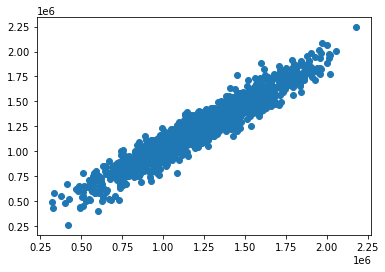

In [61]:
plt.scatter(y_test,y_pred)

 Based on the graph we can say the data is linearly distributed

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


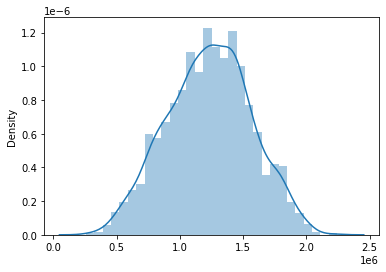

In [62]:
sns.distplot((y_test,y_pred),bins=30)

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


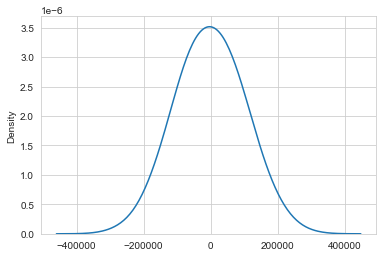

In [64]:
delta=y_test-y_pred
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta),bw=0.5)

In [65]:
from sklearn import metrics


In [66]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))

MAE: 79674.9697250489


In [67]:
print("MAPE:",metrics.mean_absolute_error(y_test,y_pred)*100)

MAPE: 7967496.97250489


In [69]:
print("MSE:",metrics.mean_squared_error(y_test,y_pred))

MSE: 9714054306.962067


In [71]:
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMSE: 98559.90212536773
